### classes and functions

In [115]:
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.ImmunoTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.RadTx = False

        if 'Other Tx' in sheet_Names:
            self.OtherTx = pd.read_excel(input_fileName, sheet_name = 'Other Tx')
        else: self.OtherTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    df_asint.insert(0, timeColumn, df[timeColumn])
    return df_asint

def createBinarySum(df, listOfLabs, timeColumn, defaxis):
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    # df_asint.insert(0, timeColumn, df[timeColumn])
    #sum across the row
    #defaxis = 0 means the columns are preserved 
    #defaxis =1 means the rows are preserved
    df_new_sum = df_asint.sum(axis = defaxis)
    return df_new_sum

#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList


def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles
def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs
    
#function for masking a dataframe 
def patientSectionOfFrame(start_frame, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass


def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet
    
def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

# libraries and directories

In [116]:
#libraries and dirrectory 
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

### loading the directory for the data import from patient sheets

In [117]:
#location of original data
starting_directory = os.getcwd()


# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path

os.chdir(new_dirrectory)

### directory management for the output data

In [118]:
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path

### file naming for outputs

In [119]:
folderNameHeader = "DFsForSVM"
folderNameCommon = "_CompLabswoEcho_exG01J01"
folderNameSuffix = "_20241017_v1"

fileNameHeader_1 = "ALKnownPts"
fileNameHeader_2 = "ALUnknownPts"
fileNameCommon = "_CompLabswoEcho_exG01J01"
fileNameSuffix = "_20241017_v1"

folder_data_out = makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

folderNameOut = folder_data_out

In [120]:
#file name suffix 
outputSheet_Suffix = fileNameSuffix
outputSheet_common = fileNameCommon

# penalty scores used throughout for missing data and low time resolution

### length 1 data

In [121]:
#filler information for fits of 1 point
# one_point_STD = 0
one_point_r2 = -1
# one_point_residual_error = 0

### length 0 data

In [122]:
penalty_coef= np.nan
penalty_intercept = np.nan
penalty_R2 = np.nan
penalty_residual_error = np.nan
penalty_fillna = np.nan

In [123]:
penalty_echo = -1


# Collecting the patient information

In [124]:
#importing patient data as dictionaries of dataframes

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx

In [125]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
echoDates = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData[EchoTimeColumn]
    if 'none' not in list(patientEchoDate):
        echoDates[pt] = patientEchoDate

## Collecting the lab columns we need

### list of labs to use for keywords

In [126]:
# columnsToUse =["Creatinine Result(mg/dL)", "Potassium Result(mmol/L)", "total CO2 Result", "Chloride Result(mmol/L)", "Calcium Result(mg/dL)",
#                "Sodium Result(mmol/L)", "Glucose Result", "BUN Result(mg/dL)", "Platelet Count Result(k/uL)", "Hemoglobin Result",
#                "MCHC Result", "MCV Result", "MCH Result(pg)", "HCT Result", "RBC Result", "WBC Result(k/uL)", "Albumin Result(gm/dL)",
#                "Neutrophil Result", "Monocyte Result", "Pct. Neutrophil Result", "Pct. Mono Result", "Total Serum Protein Result",
#                "Pct. Immature Gran Auto Result", "Pct. Immature Gran Auto Result", "Nucleated RBC Result", "AST Result(U/L)", "ALT Result(U/L)",
#                "Serum Electrophoresis Alpha 1 Result", "Serum Electrophoresis Alpha 2 Result", "Serum Electrophoresis Beta Result", 
#                "Serum Electrophoresis Gamma Result", "Albumin Electrophoresis Result", "LDH Result(U/L)", "Kappa Free Light Chains Result (mg/L)", 
#                "Beta-2-Microglobulin Result", "NT Pro BNP (B-Type Natriuretic Peptide)", "Troponin-T", "RDW Result", "Pct. Nucleated RBC/100 WBC Result",
#                "Bilirubin Result", "Ferritin Result(ng/mL)", "Serum Immunologic IgG Result", "Reticulocyte Percentage Result", 
#                "Serum Immunologic IgA Result Value Result", "Serum Immunologic IgM Result", "Erythrocyte SR Result", "Urine Albumin Outcome Result", 
#                "B12 Result (pg/mL)", "TIBC Result (ug/dL)", "Urinalysis Alpha2 Globulin Result", "Urinalysis Alpha1 Globulin Result", 
#                "Urinalysis Beta Globulin Result", "Lymphocyte Result", "Eosinophil Result", "Basophil Result", "Pct. Lymphocyte Result", 
#                "Pct. Eosinophil Result", "Pct. Basophil Result", "Urinalysis M Spike Result", "Urinalysis M Spike Percent Result", "Serum Electrophoresis M Spike Result"]
# # labs atleast 76% filled across all patients.  Addition of serum and urine M spike measures

In [127]:
columnsToUse = ["Ferritin Result(ng/mL)","Troponin-T","NT Pro BNP (B-Type Natriuretic Peptide)","Beta-2-Microglobulin Result",
                "ALT Result(U/L)","LDH Result(U/L)","Creatinine Result(mg/dL)","Potassium Result(mmol/L)","Glucose Result",
                "total CO2 Result","Sodium Result(mmol/L)","Calcium Result(mg/dL)","Chloride Result(mmol/L)","BUN Result(mg/dL)",
                "Platelet Count Result(k/uL)","Hemoglobin Result","MCV Result","MCHC Result","MCH Result(pg)","HCT Result",
                'RBC Result','WBC Result(k/uL)','Albumin Result(gm/dL)','Pct. Mono Result','Pct. Neutrophil Result',
                'Neutrophil Result','Monocyte Result','Nucleated RBC Result','Pct. Immature Gran Auto Result','AST Result(U/L)',
                'Total Serum Protein Result','Kappa Free Light Chains Result (mg/L)','Serum Electrophoresis Gamma Result','Albumin Electrophoresis Result',
                'Serum Electrophoresis Alpha 1 Result','Serum Electrophoresis Alpha 2 Result','Serum Electrophoresis Beta Result']

In [128]:
# ["Ferritin Result(ng/mL)","Troponin-T","NT Pro BNP (B-Type Natriuretic Peptide)","Beta-2-Microglobulin Result",
# "ALT Result(U/L)","LDH Result(U/L)","Creatinine Result(mg/dL)","Potassium Result(mmol/L)","Glucose Result",
# "total CO2 Result","Sodium Result(mmol/L)","Calcium Result(mg/dL)","Chloride Result(mmol/L)","BUN Result(mg/dL)",
# "Platelet Count Result(k/uL)","Hemoglobin Result","MCV Result","MCHC Result","MCH Result(pg)","HCT Result",
# 'RBC Result','WBC Result(k/uL)','Albumin Result(gm/dL)','Pct. Mono Result','Pct. Neutrophil Result',
# 'Neutrophil Result','Monocyte Result','Nucleated RBC Result','Pct. Immature Gran Auto Result','AST Result(U/L)',
# 'Total Serum Protein Result','Kappa Free Light Chains Result (mg/L)','Serum Electrophoresis Gamma Result','Albumin Electrophoresis Result',
# 'Serum Electrophoresis Alpha 1 Result','Serum Electrophoresis Alpha 2 Result','Serum Electrophoresis Beta Result']


## filtering the patient data for the labs of interest into dictionary with the patient dataframes

In [129]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs
    columnNames = FilterList(orig_columns, keyWords_primary = columnsToUse,
                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result", "Urine Glucose Result(mg/dL)", "Pct. Atypical Lymphocyte Result",
                                        "Indirect Bilirubin Result", "Atypical Lymphocyte Result"])
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)


    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2


C:\Users\maega\AppData\Local\Temp\ipykernel_14736\2690498258.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_14736\2690498258.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\U

## Make list of patients by amyloid status

In [130]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

list_pts_remove = ["K-01", "G-01", "J-01", "L-02"]
for pt in list_pts_remove:
    if pt in listPositive:
        listPositive.remove(pt)
    if pt in listNegative:
        listNegative.remove(pt)
    if pt in listOther:
        listOther.remove(pt)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

In [131]:
#length of groups 
print("Lenght of positive: ", len(listPositive))
print("length of negative: ", len(listNegative))
print("list of unknown: ", len(listOther))

Lenght of positive:  21
length of negative:  23
list of unknown:  19


# Encoding Demographic information

In [132]:
dict_dx_strs = {
    "MGUS" : "MGUS", 
    "MM" : "MM", 
    "Multiple Myeloma" : "MM",
    "MULTIPLE MYELOMA" : "MM" 
    #other values will be set to other
}

dict_AL_codes = {
    "yes" : "yes", 
    "no" : "no", 
    "unk" : "unk"
}

dict_sex_strs = {
    "Male" : "male",
    "MALE": "male", 
    "Female" : "female", 
    "FEMALE" : "female",  
}

#dictionary of dictionaries to help with unifying data inputs
dict_of_uni = {"AL": dict_AL_codes, 
                 "Dx": dict_dx_strs, 
                 "Sex": dict_sex_strs}

dict_of_data = {"AL": patientDictAmyloid, 
                "Dx": patientDictDx, 
                "Sex": patientDictSex}

dict_uniform_pt_AL_Dx_sex = {}

for ptID in list(patientDictDx.keys()):
    listPtValues = []
    for key in list(dict_of_uni.keys()):
        LocalValue = ''
        for code in dict_of_uni[key]:
            if code in dict_of_data[key][ptID]:
                # print(ptID, " code: ", code)
                LocalValue = dict_of_uni[key][code] 
        if LocalValue == '': 
            listPtValues.append("other")
        else:
             listPtValues.append(LocalValue)
    # print("patient values: ", listPtValues)
    dict_uniform_pt_AL_Dx_sex[ptID] = listPtValues

df_all_uniform_AL_dx_sex = pd.DataFrame.from_dict(dict_uniform_pt_AL_Dx_sex, orient='index', columns=["Amyloid Status", "Dx", "Sex"])

# df_all_encoded_AL_dx_sex.columns = ["Amyloid Status", "Dx", "Sex"]

In [133]:
#use the pandas dummy variables to create the encoded values
df_encoded = pd.get_dummies(df_all_uniform_AL_dx_sex, dtype = int)
# print(df_encoded)

In [134]:
#getting age and survival 
df_all_ages = pd.DataFrame.from_dict(patientDictAge, orient= 'index', columns= ['Age'])
df_all_survival = pd.DataFrame.from_dict(patientDictSurvival, orient='index', columns= ['Survival (in months)'])

#combining for demographics

df_all_demographics = pd.concat([df_encoded, df_all_ages, df_all_survival], axis= 1)

#slicing for amyloid known and unknown

df_ALKnown_demographics = df_all_demographics.loc[listALKnown]
df_ALOther_demographics = df_all_demographics.loc[listOther]

outputToExcel(df_data = df_ALKnown_demographics, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "demographics")
outputToExcel(df_data = df_ALOther_demographics, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "demographics")

# Descriptive statistics for lab data 

In [135]:
#descriptive statistics of raw lab values 
descriptive_stats_dict = {}

for pt in list(patientDictAmyloid.keys()):
    ptLabDataAll = dictOfFilteredLabs[pt]

    #create structure for one patient 
    labTracker = 0
    # LabDescStatsSeries = pd.Series()
    for lab in columnNames:
        ptLabData = ptLabDataAll[lab]

        #descriptive stats
        LabDescStats = ptLabData.dropna().astype(int).describe()
        orig_indices = LabDescStats.index
        #assumptions for data of length 1
        if LabDescStats["count"] == 1: 
            for stat in orig_indices:
                if stat != ["count"]:
                    LabDescStats[stat] = ptLabData.dropna().iloc[0]
        #renaming the indices
        newIndices = [lab + " Desc " + str(idx) for idx in orig_indices]
        LabDescStats.index = newIndices

        #add the data to a constant list

        if labTracker == 0: 
            #if this is a new patient and the first lab
            #create the series variable
            LabDescStatsSeries = LabDescStats.copy()
        if labTracker > 0: 
            #same patient as last patient, new lab
            #add the data to the series
            LabDescStatsSeries = LabDescStatsSeries._append(LabDescStats)

        #increment to track if the data is for a new patient or not
        labTracker = labTracker + 1
    #saving the data from the patient to a dictionary
    descriptive_stats_dict[pt] = LabDescStatsSeries

#converting the dictionary to a dataframe
#rows are patient IDs
#columns are the descriptive statistics for a particular lab
df_all_DescriptiveStats = pd.DataFrame.from_dict(descriptive_stats_dict, orient='index')


### filling missing data

In [136]:
#fill missing data
# penalty_fillna_descriptiveStats =-1
# df_all_DescriptiveStats = df_all_DescriptiveStats.fillna(penalty_fillna_descriptiveStats)

In [137]:

#collecting only those which are AL +/- 
df_ALKnown_DescriptiveStats = df_all_DescriptiveStats.loc[listALKnown]
df_ALOther_DescriptiveStats = df_all_DescriptiveStats.loc[listOther]

outputToExcel(df_data = df_ALKnown_DescriptiveStats, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "labs-descriptive")
outputToExcel(df_data = df_ALOther_DescriptiveStats, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "labs-descriptive")

# fits of the data

## defintion of functions for fitting data

In [138]:
#definitions of functions 
def linear_model(x, a, b):
    return a * x + b 

def linear_model_forceB(x, a):
    return a * x 

def quadratic_model(x, a, b, c):
    return a * x**2 + b*x + c

# Define model systems
def quadratic_model_force(x, a, b):
    return a * x **2 + b*x 


In [139]:
def prepDataForFit(dataframe, time, dataColumn, transform = ["none"]):
    dataValues =dataframe[[time, dataColumn]] #collect the data

    #clean data for null or 0 data and remove any negative y values
    #negative y values are not physiologic
    if transform == ["none"]:
        dataValues = dataValues.dropna(axis = 'rows').loc[dataValues[dataColumn]>=0]
    elif transform == ["ln"]:
        #tranform can't handle 0 values
        dataValues = dataValues.dropna(axis = 'rows').loc[dataValues[dataColumn]>=0]
        dataValues[dataColumn] = [value + 1 for value in dataValues[dataColumn]]

    # dataValues = dataValues.loc[dataValues[dataColumn]>= 0]

    x_values = dataValues[[time]]
    y_values = dataValues[dataColumn]

    datalength = len(y_values)

    return x_values, y_values, datalength

def transforms_and_shifts(y_values, transform = ["none"]):
    #y values must be a pandas dataframe for this to work
    if transform == ["none"]:
        baseline = y_values.iloc[0]
        y_values_shift = y_values - baseline
        return y_values_shift, baseline
    elif transform == ["ln"]:
        y_values_transformed = np.log(y_values)
        baseline = y_values_transformed.iloc[0]
        y_values_shift = y_values_transformed - baseline
        return y_values_shift, baseline

## linear fit with forced intercept and threshold set to 2 data points

In [140]:
LabFitsDict = {}
for ptID in list(patientDictAmyloid.keys()):
# for ptID in listALKnown:
    # print("pt ID: ", ptID)
    ptLabs = dictOfFilteredLabs[ptID]
    model_type = "Linear"

    regression_parameters = {} #dictionary for data 
    labTracker = 0 #tracking if this is the first lab for a patient 
    for lab in columnNames: 
        x_values, y_values_raw, dataLength = prepDataForFit(ptLabs, x_column_name, lab)

        if dataLength > 1: 
            y_values, baseline = transforms_and_shifts(y_values_raw, transform = ["none"])
            #flattening data so you can work with it in curve fit 
            x_flat = x_values.squeeze()
            y_flat = y_values.squeeze()

            # Fit the model to the adjusted data
            popt, pcov = curve_fit(linear_model_forceB, x_flat, y_flat)

            # get properties
            m = popt[0]

            # Create the linear fit for calculating quality of fit
            #these values are still ln transformed and shifted, compare to y_values
            y_predict = linear_model_forceB(x_values, m) #+ ptBaseline2

            #calc R^2
            r_squared = r2_score(y_flat, y_predict)

            #calc residual error (mean squared error)
            residual_error = mean_squared_error(y_flat, y_predict)
            
            residuals = y_values - y_predict.squeeze()
            residualsIndex = x_values.squeeze()
            residuals = residuals.set_axis(residualsIndex)

            #assigning the parameters to a dataframe to place into
            regression_parameters = {
                'coef' : m,
                'intercept': baseline, 
                'R2' : r_squared, 
                'residual error': residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters)

            #get descriptive information about the residuals 
            descResiduals = residuals.describe()

            orig_indices_descResiduals = descResiduals.index
            newIndices_descResiduals = [lab + " " + model_type + " RegresDesc " + str(idx) for idx in orig_indices_descResiduals]
            descResiduals.index = newIndices_descResiduals

            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

        elif dataLength == 1: 
            #find the starting value at baseline
            y_values, baseline = transforms_and_shifts(y_values_raw, transform = ["none"])
            #flattening data so you can work with it in curve fit 
            x_flat = x_values.squeeze()
            y_flat = y_values.squeeze()

            # Get the slope (m)
            m = 0

            # Create the linear fit for calculating quality of fit
            y_predict = linear_model_forceB(x_values, m) #+ ptBaseline2

            #calc R^2
            r_squared = one_point_r2

            #calc residual error (mean squared error)
            residual_error = baseline
            
            residuals = y_values - y_predict.squeeze()

            #assigning the parameters to a dataframe to place into
            regression_parameters = {
                'coef' : m,
                'intercept': baseline, 
                'R2' : r_squared, 
                'residual error': residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters)

            #get descriptive information about the residuals 
            descResiduals = residuals.describe()

            for desc in descResiduals.index:
                if desc != ["count"]:
                    descResiduals[desc] = baseline

            orig_indices_descResiduals = descResiduals.index
            newIndices_descResiduals = [lab + " " + model_type + " RegresDesc " + str(idx) for idx in orig_indices_descResiduals]
            descResiduals.index = newIndices_descResiduals

            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

        else:
            #not enough data to perform regression
            regression_parameters = {
                'coef' : penalty_coef,
                'intercept': penalty_intercept, 
                'R2' : penalty_R2,
                'residual error': penalty_residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters) 
            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

        if labTracker == 0: 
            #if this is a new patient and the first lab
            #create the series variable
            LabFitSeries = regression_params_2series.copy()
            if dataLength > 0: 
                LabFitSeries = LabFitSeries._append(descResiduals)
        elif labTracker > 0: 
            #same patient as last patient, new lab
            #add the data to the series
            LabFitSeries = LabFitSeries._append(regression_params_2series)
            if dataLength > 0:
                LabFitSeries = LabFitSeries._append(descResiduals)
        labTracker = labTracker + 1 

    #saving the data from the patient to a dictionary
    
    LabFitsDict[ptID] = LabFitSeries

#converting the dictionary to a dataframe
#rows are patient IDs
#columns are the descriptive statistics for a particular lab
df_all_LabFitsLinear = pd.DataFrame.from_dict(LabFitsDict, orient='index')


### Filling missing data

In [141]:
#fill missing data
# df_all_LabFitsLinear = df_all_LabFitsLinear.fillna(penalty_fillna)

In [142]:
# #collecting only those which are AL +/- 
df_ALKnown_LabFitsLinear = df_all_LabFitsLinear.loc[listALKnown]
df_ALOther_LabFitsLinear = df_all_LabFitsLinear.loc[listOther]


outputToExcel(df_data = df_ALKnown_LabFitsLinear, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "Labs-LinFit")
outputToExcel(df_data = df_ALOther_LabFitsLinear, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "Labs-LinFit")

## exponential fits threshold set to 2

In [143]:
LabFitsDict = {}
for ptID in list(patientDictAmyloid.keys()):
    ptLabs = dictOfFilteredLabs[ptID]
    model_type = "Exp"

    regression_parameters = {} #dictionary for data 
    labTracker = 0 #tracking if this is the first lab for a patient 
    for lab in columnNames: 
        x_values, y_values_raw, dataLength = prepDataForFit(ptLabs, x_column_name, lab, transform=["ln"])

        if dataLength > 1: 
            y_values, baseline = transforms_and_shifts(y_values_raw, transform = ["ln"])
            #flattening data so you can work with it in curve fit 
            x_flat = x_values.squeeze()
            y_flat = y_values.squeeze()

            # Fit the model to the adjusted data
            popt, pcov = curve_fit(linear_model_forceB, x_flat, y_flat)

            # get properties
            m = popt[0]

            # Create the linear fit for calculating quality of fit
            #these values are still ln transformed and shifted, compare to y_values
            y_predict = linear_model_forceB(x_values, m) #+ ptBaseline2

            #calc R^2
            r_squared = r2_score(y_flat, y_predict)

            #calc residual error (mean squared error)
            residual_error = mean_squared_error(y_flat, y_predict)
            
            residuals = y_values - y_predict.squeeze()
            residualsIndex = x_values.squeeze()
            residuals = residuals.set_axis(residualsIndex)

            #assigning the parameters to a dataframe to place into
            regression_parameters = {
                'coef' : m,
                'intercpet': baseline, 
                'R2' : r_squared, 
                'residual error': residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters)

            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

            #get descriptive information about the residuals 
            descResiduals = residuals.describe()

            orig_indices_descResiduals = descResiduals.index
            newIndices_descResiduals = [lab + " " + model_type + " RegresDesc " + str(idx) for idx in orig_indices_descResiduals]
            descResiduals.index = newIndices_descResiduals

        elif dataLength == 1: 
            #find the starting value at baseline
            y_values, baseline = transforms_and_shifts(y_values_raw, transform = ["ln"])
            #flattening data so you can work with it in curve fit 
            x_flat = x_values.squeeze()
            y_flat = y_values.squeeze()

            # Get the slope (m)
            m = 0

            # Create the linear fit for calculating quality of fit
            y_predict = linear_model_forceB(x_values, m) #+ ptBaseline2

            #calc R^2
            r_squared = one_point_r2

            #calc residual error (mean squared error)
            residual_error = baseline
            
            residuals = y_values - y_predict.squeeze()

            #assigning the parameters to a dataframe to place into
            regression_parameters = {
                'coef' : m,
                'intercpet': baseline, 
                'R2' : r_squared, 
                'residual error': residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters)
            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

            #get descriptive information about the residuals 
            descResiduals = residuals.describe()
            for desc in descResiduals.index:
                if desc != ["count"]:
                    descResiduals[desc] = baseline

            orig_indices_descResiduals = descResiduals.index
            newIndices_descResiduals = [lab + " " + model_type + " RegresDesc " + str(idx) for idx in orig_indices_descResiduals]
            descResiduals.index = newIndices_descResiduals

        else:
            #not enough data to perform regression
            regression_parameters = {
                'coef' : penalty_coef,
                'intercpet': penalty_intercept, 
                'R2' : penalty_R2,
                'residual error': penalty_residual_error
            }
            #convert the dictionary to a series so you can reassign the indices 
            regression_params_2series = pd.Series(regression_parameters) 
            orig_indices_regresparams = regression_params_2series.index
            newIndices_regresparams = [lab + " " + model_type + " " + str(idx) for idx in orig_indices_regresparams]
            regression_params_2series.index = newIndices_regresparams

        if labTracker == 0: 
            #if this is a new patient and the first lab
            #create the series variable
            LabFitSeries = regression_params_2series.copy()
            if dataLength > 0: 
                LabFitSeries = LabFitSeries._append(descResiduals)
        elif labTracker > 0: 
            #same patient as last patient, new lab
            #add the data to the series
            LabFitSeries = LabFitSeries._append(regression_params_2series)
            if dataLength > 0:
                LabFitSeries = LabFitSeries._append(descResiduals)
        labTracker = labTracker + 1 

    #saving the data from the patient to a dictionary
    
    LabFitsDict[ptID] = LabFitSeries

#converting the dictionary to a dataframe
#rows are patient IDs
#columns are the descriptive statistics for a particular lab
df_all_LabFitsExp = pd.DataFrame.from_dict(LabFitsDict, orient='index')


### filling missing data

In [144]:
#filling missing data
# df_all_LabFitsExp2Force = df_all_LabFitsExp2Force.fillna(penalty_fillna)

In [145]:
#collecting only those which are AL +/- 
df_ALKnown_LabFitsExp = df_all_LabFitsExp.loc[listALKnown]
df_ALOther_LabFitsExp = df_all_LabFitsExp.loc[listOther]

outputToExcel(df_data = df_ALKnown_LabFitsExp, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "Labs-ExpFit")
outputToExcel(df_data = df_ALOther_LabFitsExp, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "Labs-ExpFit")

# Encoding treatement information

In [146]:
#collecting information about treatments patient has recieved

#each condition appends 2 numbers
#first number is a boolean if the patient has data
#the second number is the total number of treatments the patient has had.

#list of dictionaries 
pt_Tx_dict_to_iterate = [patientDictChemo, patientDictImmuno, patientDictHeme, patientDictRad, patientDictOther]

dictPt_Tx_Summary = {}

for ptID in list(patientDictAge.keys()): 
    #get the treatment information for that patient
    ptTxList = [] 
    for tx in pt_Tx_dict_to_iterate:
        if type(tx[ptID]) != bool: 
            ptTxList.append(1)
            #get the length of the data
            numb_txs = len(tx[ptID])
            ptTxList.append(numb_txs)
        else:
            ptTxList.append(0)
            ptTxList.append(0)

    dictPt_Tx_Summary[ptID] = ptTxList

df_all_tx_summary = pd.DataFrame.from_dict(dictPt_Tx_Summary, orient='index')
df_all_tx_summary.columns = ["ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
"RadTx", "RadTx Number", "OtherTx", "OtherTx Number"]

In [147]:
#splitting dataframe by amyloid status
df_AL_known_tx_summary = df_all_tx_summary.loc[listALKnown]
df_AL_Unknown_tx_summary = df_all_tx_summary.loc[listOther]

In [148]:
outputToExcel(df_data = df_AL_known_tx_summary, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "txSummary")
outputToExcel(df_data = df_AL_Unknown_tx_summary, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "txSummary")

# Encoding physician note information

encoded data for physician notes is still time based and can't be immediately used as features in the classifier.  Data is encoded into integers which can then be described using descriptive statistics

In [149]:
#dictionaries for conversion
dictECOGtoKPS = {0 : 95,
                 1 : 75, 
                 2 : 55, 
                 3 : 35, 
                 4 : 15, 
                 5 : 0}

dictKPStoECOG = {100: 0, 90: 0, 
                 80: 1, 70: 1, 
                 60: 2, 50: 2, 
                 40: 3 , 30: 3, 
                 20: 4, 10: 4, 0: 5 }

dictClinicalImpression = {
    "Complete Response/No Evidence of Disease": 4,
    "Stable Disease": 2,
    "Partial Response": 3, 
    "Progressive Disease": 1, 
    "Not Applicable": np.nan,
    "Not Assessable": np.nan}
#this preserves NAN values 

#create new dictionary for storing the scored notes information
dictMDnotesScored = {}
listPtsMissingNotes = []

#call each patient in the dictionary storing patient note information
for ptID in list(patientDictNotes.keys()):
    #check to make sure the patient has note data
    if not isinstance(patientDictNotes[ptID], bool):
        #get the patient notes
        ptNotes = patientDictNotes[ptID]

        #column names of interest
        listColumnNames = ['time from diagnosis to note (months)', 'ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease']
        ptNotesCorrected = ptNotes[listColumnNames]
        
        #convert the Karnofsky scores to integers
        ptNotesCorrected['Karnofsky Performance Status'] = ptNotesCorrected['Karnofsky Performance Status'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')


        for i in range(len(ptNotesCorrected['time from diagnosis to note (months)'])):
            #get the scores for that row
            ptTime = ptNotesCorrected.at[i, 'time from diagnosis to note (months)']
            ptECOG = ptNotesCorrected.at[i,'ECOG Performance Status']
            ptKPS = ptNotesCorrected.at[i, 'Karnofsky Performance Status']
            ptClinicalImpression = ptNotesCorrected.at[i, 'Clinical Impression of Disease']

            #if the value of ptECOG was "OTHER", then the row should be dropped.
            if ptECOG == "OTHER":
                # ptNotesCorrected.drop(index = i, inplace=True ) #drops the full row, would need to add time back if interested in clinical impression
                ptECOG = np.nan #replacement is dropped before descriptive stats are run
                ptKPS = np.nan #replacement is dropped before descriptive stats are run

            #infer ECOG from Karnofsky where you now have half points
            elif np.isnan(ptECOG) ==True and pd.isna(ptKPS) == False: 
                ptECOG = dictKPStoECOG[ptKPS]

            #infer Karnofsky from ECOG 
            elif pd.isna(ptKPS) == True and np.isnan(ptECOG) ==False: 
                ptKPS = dictECOGtoKPS[ptECOG]

            #save these values back to the dataframe
            if ptECOG != "OTHER":
                ptNotesCorrected.at[i,'ECOG Performance Status'] = ptECOG
                ptNotesCorrected.at[i, 'Karnofsky Performance Status'] = ptKPS

            #checking to see if the patient has a clinical impression input
            #if there is a string, convert to a numeric value using the dictionary
            if type(ptClinicalImpression) == str:
                ptClinicalImpressionNumeric = dictClinicalImpression[ptClinicalImpression]
                ptNotesCorrected.at[i, 'Clinical Impression of Disease'] = ptClinicalImpressionNumeric
                ptNotesCorrected.at[i, 'time from diagnosis to note (months)'] =ptTime
                #you can nest this under the =! "Other" if you find the rows with no ECOG/Karnofsky data to not be helpful
    elif isinstance(patientDictNotes[ptID], bool):
        ptNotesCorrected = False
        listPtsMissingNotes.append([ptID])
                            
    #saving the notes to the new dictionary
    dictMDnotesScored[ptID] = ptNotesCorrected


C:\Users\maega\AppData\Local\Temp\ipykernel_14736\2911094203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptNotesCorrected['Karnofsky Performance Status'] = ptNotesCorrected['Karnofsky Performance Status'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')
C:\Users\maega\AppData\Local\Temp\ipykernel_14736\2911094203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptNotesCorrected['Karnofsky Performance Status'] = ptNotesCorrected['Karnofsky Performance Status'].astype(str).str.extra

### Descriptive statistics of the note information to use as features

In [150]:
#now to make this a set of descriptive statistics that can be used in the dataframe
#challenged by nan values
descriptive_stats_dict_notes = {}

for pt in list(dictMDnotesScored.keys()):
    if not isinstance(patientDictNotes[pt], bool):
        ptNoteData = dictMDnotesScored[pt]

        #create structure for one patient 
        columnTracker = 0
        # LabDescStatsSeries = pd.Series()
        listColumnNames_woTime = ['ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease']

        for col in listColumnNames_woTime:
            ptColData = ptNoteData[col]
            # ptLabData = ptLabData.dropna()

            #descriptive stats
            ColDescStats = ptColData.dropna().astype(int).describe()
            orig_indices = ColDescStats.index
            #check to see if data length is 1
            if ColDescStats['count'] == 1:
                for stat in orig_indices:
                    if stat != ["count"]:
                        ColDescStats[stat] = ptColData.dropna().iloc[0]
            newIndices = [col + " Desc " + str(idx) for idx in orig_indices]
            ColDescStats.index = newIndices
            
            #add the data to a constant list

            if columnTracker == 0: 
                #if this is a new patient and the first lab
                #create the series variable
                ColDescStatsSeries = ColDescStats.copy()
            if columnTracker > 0: 
                #same patient as last patient, new lab
                #add the data to the series
                ColDescStatsSeries = ColDescStatsSeries._append(ColDescStats)

            #increment to track if the data is for a new patient or not
            columnTracker = columnTracker + 1
        #saving the data from the patient to a dictionary
        descriptive_stats_dict_notes[pt] = ColDescStatsSeries

#converting the dictionary to a dataframe
#rows are patient IDs
#columns are the descriptive statistics for a particular lab
df_all_DescriptiveStats_notes = pd.DataFrame.from_dict(descriptive_stats_dict_notes, orient='index')



In [151]:
#fill in missing values and patients
penaltyNoteData = [[-1] * len(df_all_DescriptiveStats_notes.columns)]
columns = list(df_all_DescriptiveStats_notes.columns)
for ptID in listPtsMissingNotes:
    df_penalty_noteData = pd.DataFrame(data=penaltyNoteData, columns= columns, index = ptID)
    df_all_DescriptiveStats_notes = df_all_DescriptiveStats_notes._append(df_penalty_noteData)
#fill missing
df_all_DescriptiveStats_notes = df_all_DescriptiveStats_notes.fillna(-1)

In [152]:
# if "T-01" in listALKnown:
#     listALKnown.remove("T-01")
# if "T-01" in listOther:
#     listOther.remove("T-01")

df_ALKnown_MDNotesDescriptive = df_all_DescriptiveStats_notes.loc[listALKnown]
df_ALOther_MDNotesDescriptive = df_all_DescriptiveStats_notes.loc[listOther]


In [153]:
outputToExcel(df_data = df_ALKnown_MDNotesDescriptive, fileName_header= "AL-KnownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "MDNotes-desc")
outputToExcel(df_data = df_ALOther_MDNotesDescriptive, fileName_header= "AL-UnknownPts", fileName_Common= outputSheet_common, fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= "MDNotes-desc")

# link all the dataframes together

In [154]:
df_allpts_summary = pd.concat([df_all_demographics, df_all_DescriptiveStats, df_all_LabFitsLinear, df_all_LabFitsExp,
                               df_all_DescriptiveStats_notes, df_all_tx_summary], axis = 1)

df_AL_known_summary = df_allpts_summary.loc[listALKnown]
df_AL_unknown_summary = df_allpts_summary.loc[listOther]

In [155]:
#for amyloid status known patients
df_ALKnown_summary = pd.concat([df_ALKnown_demographics, df_ALKnown_DescriptiveStats,
                    df_ALKnown_LabFitsLinear,
                    df_ALKnown_LabFitsExp, df_ALKnown_MDNotesDescriptive, df_AL_known_tx_summary], axis =1 )

outputToExcel(df_data = df_ALKnown_summary, fileName_header= "AL-KnownPts", fileName_Common= fileNameCommon + "_1Sheet", fileName_suffix= outputSheet_Suffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "ALL")

df_ALOther_summary = pd.concat([df_ALOther_demographics, df_ALOther_DescriptiveStats,
                    df_ALOther_LabFitsLinear,
                    df_ALOther_LabFitsExp, df_ALOther_MDNotesDescriptive, df_AL_Unknown_tx_summary], axis =1 )

outputToExcel(df_data = df_ALOther_summary, fileName_header= "AL-UnknownPts", fileName_Common= fileNameCommon + "_1Sheet", fileName_suffix= outputSheet_Suffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "ALL")

In [156]:

# df_all = pd.concat([df_all_demographics, df_all_EchoTest, df_all_DescriptiveStats,
#                     df_all_LabFitsLinear, df_all_LabFitsLinearWB, df_all_LabFitsQuadForce,
#                     df_all_LabFitsExp2Force, df_all_LabFitsExp3Force], axis =1 )
# outputToExcel(df_data = df_all, fileName_header= "AllPts", fileName_Common= "-Summary-One", fileName_suffix= "_2024-06-28",
#         parent_dir= outputDir, folderName=folderNameOut, sheetName= "ALL")

# visualization of completeness

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
color_map = "PiYG"

Text(0.5, 1.0, 'correlation all features')

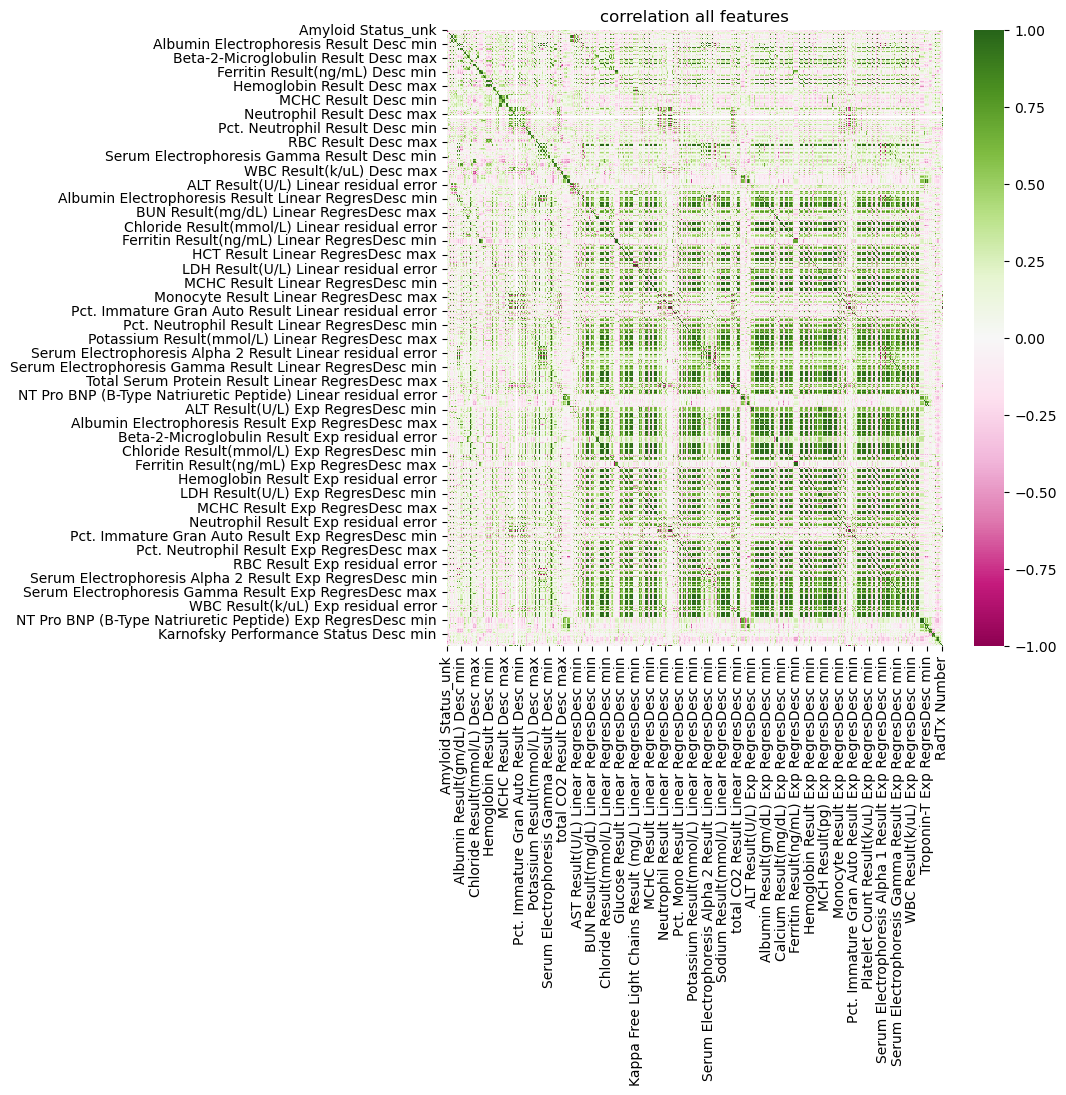

In [159]:
matrix_all = df_ALKnown_summary.iloc[:,1:].corr()
#visualizing matrix 
# import seaborn as sns
# import matplotlib as plt
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(matrix_all, cmap = color_map, annot = False)
plt.title("correlation all features")

In [160]:
#missingness plot
df_missingness = df_ALKnown_summary.iloc[:,1:]


<Axes: >

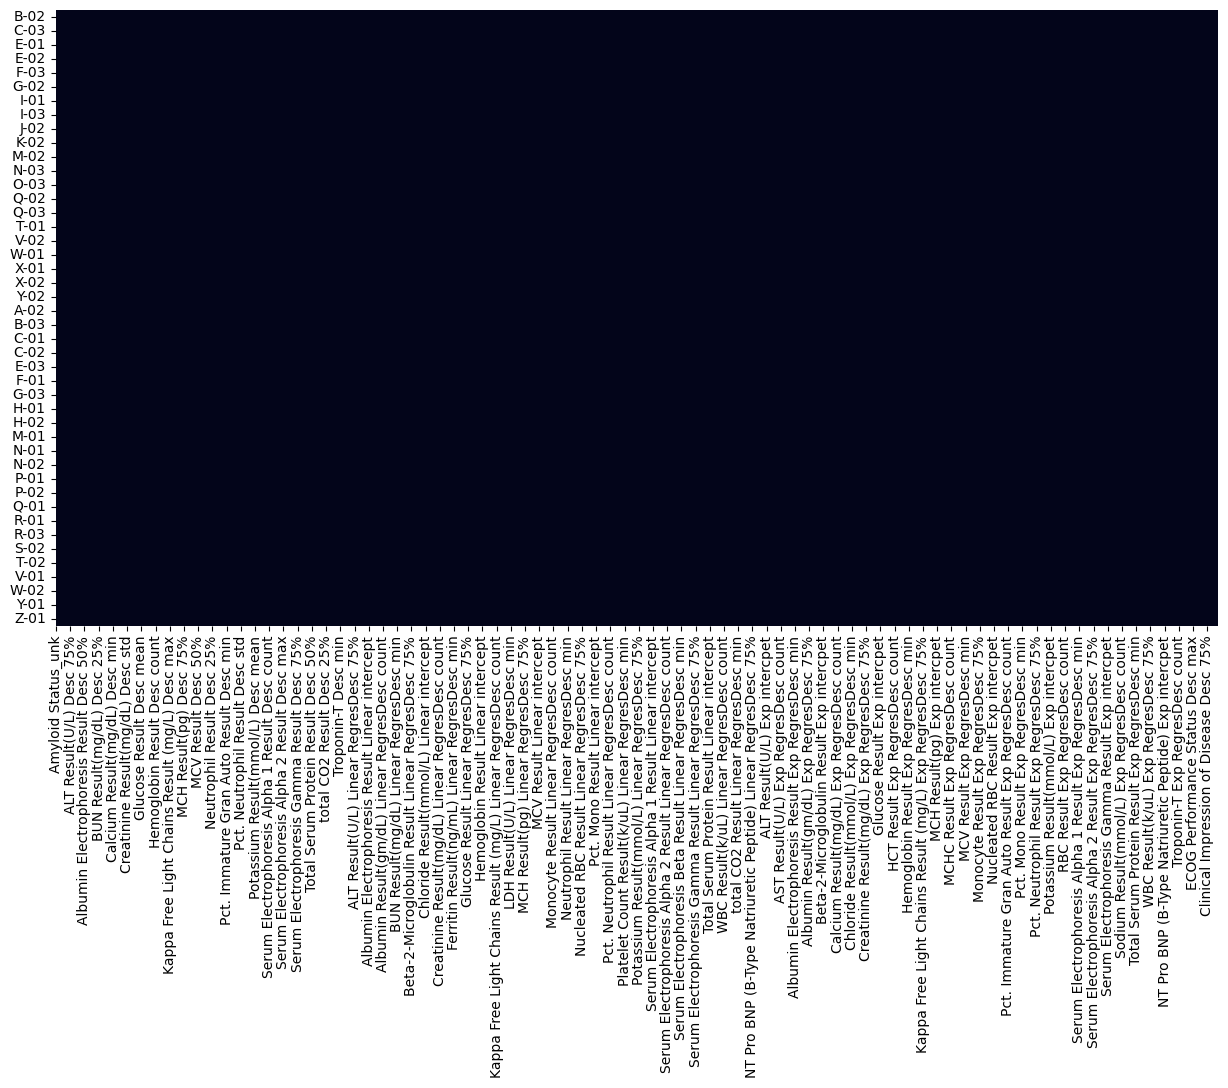

In [161]:
fig, ax =plt.subplots(figsize = (15, 8))
sns.heatmap(df_missingness.isna(), cbar=False, yticklabels=df_ALKnown_summary.index)